In [3]:
import pandas as pd

# some lines have too many fields (?), so skip bad lines
imgatt = pd.read_csv("C:/Users/jerem/Documents/Cours/M2/big data/data/CUB_200_2011/attributes/image_attribute_labels.txt",
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                     usecols=[0,1,2], names=['imgid', 'attid', 'present'])

# description from dataset README:
# 
# The set of attribute labels as perceived by MTurkers for each image
# is contained in the file attributes/image_attribute_labels.txt, with
# each line corresponding to one image/attribute/worker triplet:
#
# <image_id> <attribute_id> <is_present> <certainty_id> <time>
#
# where <image_id>, <attribute_id>, <certainty_id> correspond to the IDs
# in images.txt, attributes/attributes.txt, and attributes/certainties.txt
# respectively.  <is_present> is 0 or 1 (1 denotes that the attribute is
# present).  <time> denotes the time spent by the MTurker in seconds.

C:\Users\jerem\AppData\Local\Temp\ipykernel_12736\3045409612.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv("C:/Users/jerem/Documents/Cours/M2/big data/data/CUB_200_2011/attributes/image_attribute_labels.txt",
C:\Users\jerem\AppData\Local\Temp\ipykernel_12736\3045409612.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  imgatt = pd.read_csv("C:/Users/jerem/Documents/Cours/M2/big data/data/CUB_200_2011/attributes/image_attribute_labels.txt",


In [4]:
imgatt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [5]:
imgatt.shape

(3677856, 3)

In [6]:
# need to reorganize imgatt to have one row per imgid, and 312 columns (one column per attribute),
# with 1/0 in each cell representing if that imgid has that attribute or not

imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

In [7]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [8]:
imgatt2.shape

(11788, 312)

In [9]:
# now we need to load the image true classes

imglabels = pd.read_csv("C:/Users/jerem/Documents/Cours/M2/big data/data/CUB_200_2011/image_class_labels.txt", 
                        sep=' ', header=None, names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

# description from dataset README:
#
# The ground truth class labels (bird species labels) for each image are contained
# in the file image_class_labels.txt, with each line corresponding to one image:
#
# <image_id> <class_id>
#
# where <image_id> and <class_id> correspond to the IDs in images.txt and classes.txt,
# respectively.

In [10]:
imglabels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

In [11]:
imglabels.shape

(11788, 1)

In [12]:
# now we need to attach the labels to the attribute data set,
# and shuffle; then we'll separate a test set from a training set

df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [13]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [14]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1074     0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
11060    0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
7365     0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
3425     0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
11559    0    0    0    0    0    0    1    0    0    0  ...    0    0    0   

       306  307  308  309  310  311  312  
imgid                                     
1074     0    0    0    1    0    0    0  
11060    0    1    0    1    0    0    0  
7365     0    0    0    0    0    0    1  
3425     1    0    0    1    0    0    0  
11559    0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [15]:
df_label.head()

label
imgid       
1074      20
11060    188
7365     126
3425      59
11559    197

In [16]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [18]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [19]:
print(clf.predict(df_train_att.head()))

[ 20 188 126  59 197]


In [20]:
clf.score(df_test_att, df_test_label)

0.44640971488912357

In [21]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [22]:
cm

array([[ 3,  2,  7, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  1,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  1,  9,  0],
       [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64)

In [23]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [24]:
birds = pd.read_csv("C:/Users/jerem/Documents/Cours/M2/big data/data/CUB_200_2011/classes.txt",
                    sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [25]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalized confusion matrix
[[0.14 0.09 0.32 ... 0.   0.   0.  ]
 [0.   0.59 0.   ... 0.   0.   0.  ]
 [0.   0.06 0.41 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.14 0.   0.  ]
 [0.   0.   0.   ... 0.06 0.53 0.  ]
 [0.   0.   0.   ... 0.   0.   0.9 ]]


In [26]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.2655755015839493

In [31]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.46673706441393875

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.44 (+/- 0.02)


In [29]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.02)


In [30]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.02)


In [30]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2
        i += 1
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
              (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.02)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.01)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.01)
Max features: 5, num estimators: 150, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 190, accuracy: 0.45 (+/- 0.01)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.02)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.02)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.02)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.02)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.01)
Max features: 10, num estimators: 110, accura

C:\Users\jerem\AppData\Local\Temp\ipykernel_19192\3308358187.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


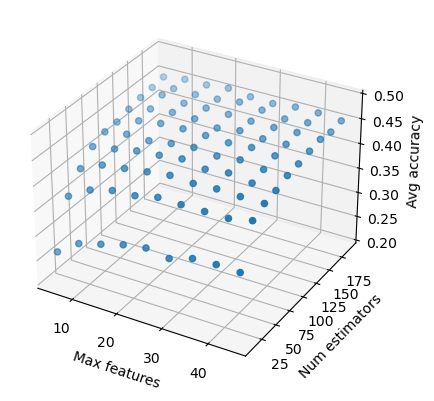

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()